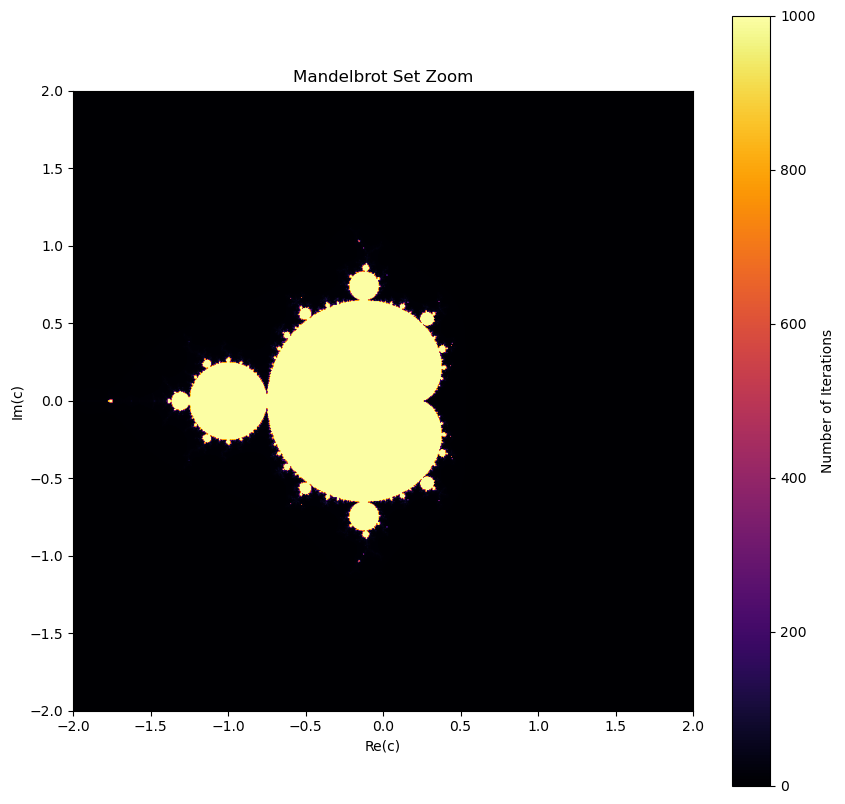

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass

@dataclass
class MandelbrotSet:
    max_iterations: int

    def is_stable(self, c: complex) -> int:
        """Returns the number of iterations before a point escapes, or max_iterations if it doesn't."""
        z = 0
        for iteration in range(self.max_iterations):
            z = z**2 + c
            if abs(z) > 2:
                return iteration
        return self.max_iterations

    def generate(self, x_min, x_max, y_min, y_max, width, height):
        """Generates a grid of stability values for the Mandelbrot set."""
        x = np.linspace(x_min, x_max, width)
        y = np.linspace(y_min, y_max, height)
        mandelbrot_grid = np.zeros((height, width))

        for i, y_val in enumerate(y):
            for j, x_val in enumerate(x):
                c = complex(x_val, y_val)
                mandelbrot_grid[i, j] = self.is_stable(c)

        return mandelbrot_grid


def plot_mandelbrot(data, x_min, x_max, y_min, y_max):
    """Plots the Mandelbrot set data."""
    plt.figure(figsize=(10, 10))
    plt.imshow(data, extent=[x_min, x_max, y_min, y_max], cmap="inferno", origin="lower")
    plt.colorbar(label="Number of Iterations")
    plt.title("Mandelbrot Set Zoom")
    plt.xlabel("Re(c)")
    plt.ylabel("Im(c)")
    plt.show()


if __name__ == "__main__":
    # Mandelbrot parameters
    max_iterations = 1000
    width, height = 800, 800

    # Zoom into a specific region
    #center_x, center_y = -0.747348, 0.10031  # Example: center of the famous "seahorse valley"
    #zoom_width, zoom_height = 0.0001, 0.0001 # Smaller values = higher zoom
    center_x, center_y = 0, 0  # Example: center of the famous "seahorse valley"
    zoom_width, zoom_height = 4, 4 # Smaller values = higher zoom
    x_min = center_x - zoom_width / 2
    x_max = center_x + zoom_width / 2
    y_min = center_y - zoom_height / 2
    y_max = center_y + zoom_height / 2

    # Generate and plot the Mandelbrot set
    mandelbrot = MandelbrotSet(max_iterations=max_iterations)
    mandelbrot_data = mandelbrot.generate(x_min, x_max, y_min, y_max, width, height)
    plot_mandelbrot(mandelbrot_data, x_min, x_max, y_min, y_max)

#good output center (-1.25, 0.087) zoom (0.0005, 0.0005) iter 1000